## BIBLIOTECA

In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
!pip install opendatasets
import opendatasets as od

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy
import matplotlib.pyplot as plt

## LOAD_SET

In [4]:
# Antes de ejecutar este codigo, debes obtener el json (settings/ create new Token), porque este codigo te lo va a pedir.
dataset_link="https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis" #Link donde se ubica el set de datos.
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: martinerramuspe
Your Kaggle Key: ··········


100%|██████████| 1.99M/1.99M [00:00<00:00, 56.7MB/s]

In [5]:
os.chdir("twitter-entity-sentiment-analysis") # nombre del directorio
os.listdir() # Para ver lista de archivo que contiene ese directorio.

['twitter_validation.csv', 'twitter_training.csv']

In [6]:
columns = ['id','country','Label','Text']
archivo="twitter_training.csv"
archivo2="twitter_validation.csv"
df1=pd.read_csv(archivo,names=columns) # Importamos datos.
df2=pd.read_csv(archivo2,names=columns) # Importamos datos.
print(f"El set train tiene la siguiente dimension:{df1.shape}")
print(f"El set validacion tiene la siguiente dimension:{df2.shape}")
df = pd.concat([df1, df2], ignore_index=True)
print(f"El set concatenado tiene la siguiente dimension:{df.shape}")

El set train tiene la siguiente dimension:(74682, 4)
El set validacion tiene la siguiente dimension:(1000, 4)
El set concatenado tiene la siguiente dimension:(75682, 4)


## EXPLORACION

In [7]:
df.head()

,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
# Podemos observar presencia de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       75682 non-null  int64 
 1   country  75682 non-null  object
 2   Label    75682 non-null  object
 3   Text     74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


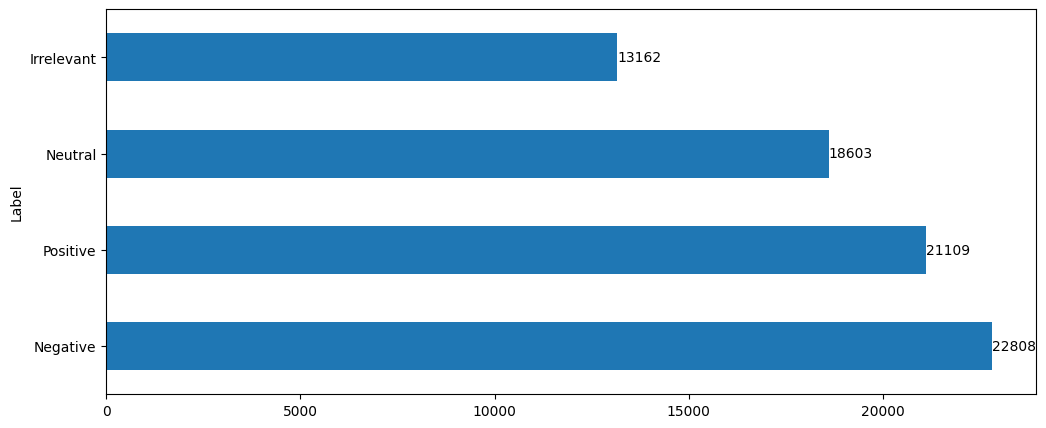

In [9]:
# Obervamos el balance de las etiquetas dentro del Target
recuentos = df["Label"].value_counts()
plt.figure(figsize=(12, 5))# Tamaño figura
ax = recuentos.plot(kind='barh')
# Agregar los valores en cada barra
for i, recuento in enumerate(recuentos):
    ax.text(recuento, i, str(recuento), ha='left', va='center')
plt.show()

In [10]:
# obervamos categorias existentes en "country"
df["country"].value_counts()

country
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                    

In [11]:
df["Text"].loc[0]

'im getting on borderlands and i will murder you all ,'

In [12]:
# Exploramos combinacion
for i in range(5):
    print(f"{i+1}: {df['Text'][i]} -> {df['Label'][i]}")

1: im getting on borderlands and i will murder you all , -> Positive
2: I am coming to the borders and I will kill you all, -> Positive
3: im getting on borderlands and i will kill you all, -> Positive
4: im coming on borderlands and i will murder you all, -> Positive
5: im getting on borderlands 2 and i will murder you me all, -> Positive


##PREPROCESAMIENTO

In [13]:
#Eliminamos  fila donde aparezca por lo menos 1 dato nulo en las variables predictoras
df.dropna(inplace=True)

In [14]:
# Cargamos paquete preprocesador de lenguaje
nlp = spacy.load("en_core_web_sm")

In [15]:
# Funcion a desarrolla varios procesos en el texto:
# -tokenizar
# -Eliminación de palabras de parada y lematización
# -Filtrado de tokens
# -Reconstrucción del texto preprocesado

def preprocess(text):

    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [16]:
# Aplicamos funcion a "Text" para obtener texto limpio en "Preprocessed_Text"
df["Preprocessed_Text"]=df["Text"].apply(preprocess)

In [17]:
# Transformamos en numeros, las etiquetas de la variable target.
le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Label'])

In [18]:
df.head()

,id,country,Label,Text,Preprocessed_Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [19]:
X= df['Preprocessed_Text']
y= df['Label']

In [20]:
# Vectorizamos texto:

# Crear el objeto TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Transformamos texto en variables predicturas numericas
X= vectorizer.fit_transform(X)

**explicacion de max_df = 0.7**:

En el caso de un DataFrame donde cada fila representa un comentario y la columna "comment" contiene el texto de esos comentarios, la frecuencia del documento se calcularía sobre la base de cuántos comentarios (filas) contienen la palabra "hermoso".

Si la palabra "hermoso" aparece en 80 de las 100 filas, esto significa que tiene una frecuencia del documento del 80%. Si se establece max_df=0.7, cualquier palabra que aparezca en más del 70% de los comentarios sería ignorada durante la vectorización TF-IDF.

En este ejemplo, "hermoso" se ignoraría durante el proceso de vectorización TF-IDF si se establece max_df=0.7, ya que su frecuencia del documento es del 80%, lo que supera el límite del 70%.

In [21]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=42, stratify=df['Label'])#stratify es para respete el balance de etiquetas cuando se realiza el split.

In [22]:
print("Dimension de X_train:", X_train.shape)
print("Dimension de X_test:", X_test.shape)

Dimension de X_train: (59996, 28395)
Dimension de X_test: (15000, 28395)


In [23]:
y_train

46708    3
12946    3
50856    0
36536    2
57769    1
        ..
271      1
11406    2
34901    1
54913    1
31899    2
Name: Label, Length: 59996, dtype: int64

In [24]:
#Observamos primer elemento.
y_train.iloc[0]

3

In [25]:
# Exploramos nueva dimension
X_train.shape

(59996, 28395)

In [26]:
X_test.shape

(15000, 28395)

In [27]:
# Obtener las características y los nombres de las características
feature_names = vectorizer.get_feature_names_out()
# Nombre de palabras unicas
print(feature_names)

['00' '000' '00011' ... 'นจาก' 'ℐℓ٥' '𝐍𝐄𝐖𝐒𝐔𝐏𝐃𝐀𝐓𝐄𝐒']


In [28]:
# Observamos la composicion de la matriz
print(X_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## MODELADO

### Modelo_01:Random_forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Medir el tiempo de finalización
end_time = time.time()

# Calcular la duración del entrenamiento
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

# Predecir en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la precisión del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)


Training Time: 361.29980182647705 seconds
Accuracy of Random Forest: 0.9118


### Modelo_02:Redes_neuronales

In [30]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, Model, Input
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
import time
from keras.utils import to_categorical


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from keras.layers import Activation


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
# Obtener el número de clases automáticamente
n_classes = 4

# MODELO_1
#---------------------------------------------------------------------#
# Definimos parametros
lr = 2.0
epochs = 42
batch_size = 2000
np.random.seed(14)

In [54]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

# Definir la capa de entrada
inputs = Input(shape=(X_train.shape[1],))

# Añadir capas ocultas
dense1 = Dense(128, activation='relu')(inputs)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
dense3 = Dense(32, activation='relu')(dropout2)
dense4 = Dense(16, activation='relu')(dense3)  # Nueva capa oculta

# Capa de salida
outputs = Dense(n_classes, activation='softmax')(dense4)

# Crear el modelo
model = Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True, verbose=1)

# Medir el tiempo de finalización
end_time = time.time()

# Calcular la duración del entrenamiento
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28395)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │       3,634,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,645,620 (13.91 MB)

 Trainable params: 3,645,620 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.3159 - loss: 1.3668 - val_accuracy: 0.5423 - val_loss: 1.2284
Epoch 2/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5378 - loss: 1.1510 - val_accuracy: 0.6767 - val_loss: 0.8323
Epoch 3/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7070 - loss: 0.7679 - val_accuracy: 0.8165 - val_loss: 0.5722
Epoch 4/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8450 - loss: 0.4972 - val_accuracy: 0.8545 - val_loss: 0.4315
Epoch 5/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8862 - loss: 0.3510 - val_accuracy: 0.8727 - val_loss: 0.3680
Epoch 6/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9081 - loss: 0.2713 - val_accuracy: 0.8792 - val_loss: 0.3390
Epoch 7/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9202 - loss: 0.2271 - val_accuracy: 0.8879 - val_loss: 0.3296
Epoch 8/42
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9305 - loss: 0.1945 - val_accuracy: 0.8913 -

In [32]:
X_test[44]

<1x28395 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [33]:
#EJEMPLO DE PREDICCION
# Predecir con el modelo de redes neuronales
example_text = X_test[0]  # Obtener el primer ejemplo de X_test
example_text = example_text.reshape(1, -1)  # Ajustar la forma para que sea compatible con el modelo

# Realizar la predicción
predictions = model_1.predict(example_text)

# Decodificar las predicciones (obtener la clase predicha)
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Class: 1


In [34]:
#PROBABILIDAD
# Realizar la predicción
predictions = model_1.predict(example_text)

# Imprimir las probabilidades de cada clase
print("Probabilities for each class:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Probabilities for each class: [[2.2829389e-04 9.9890816e-01 6.6757575e-04 1.9596337e-04]]


### Modelo_03:PassiveAggressive

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
import time

# Crear el clasificador PassiveAggressive con parámetros ajustados
clf = PassiveAggressiveClassifier(C=1.0, loss='hinge', tol=1e-3, max_iter=500, fit_intercept=True, random_state=42)

# Medir el tiempo de inicio
start_time = time.time()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Medir el tiempo de finalización
end_time = time.time()

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la duración del entrenamiento
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Training Time: 7.384928941726685 seconds
Accuracy: 0.8488666666666667
